# Drawing picture for this website
Author: Yueqian Lin

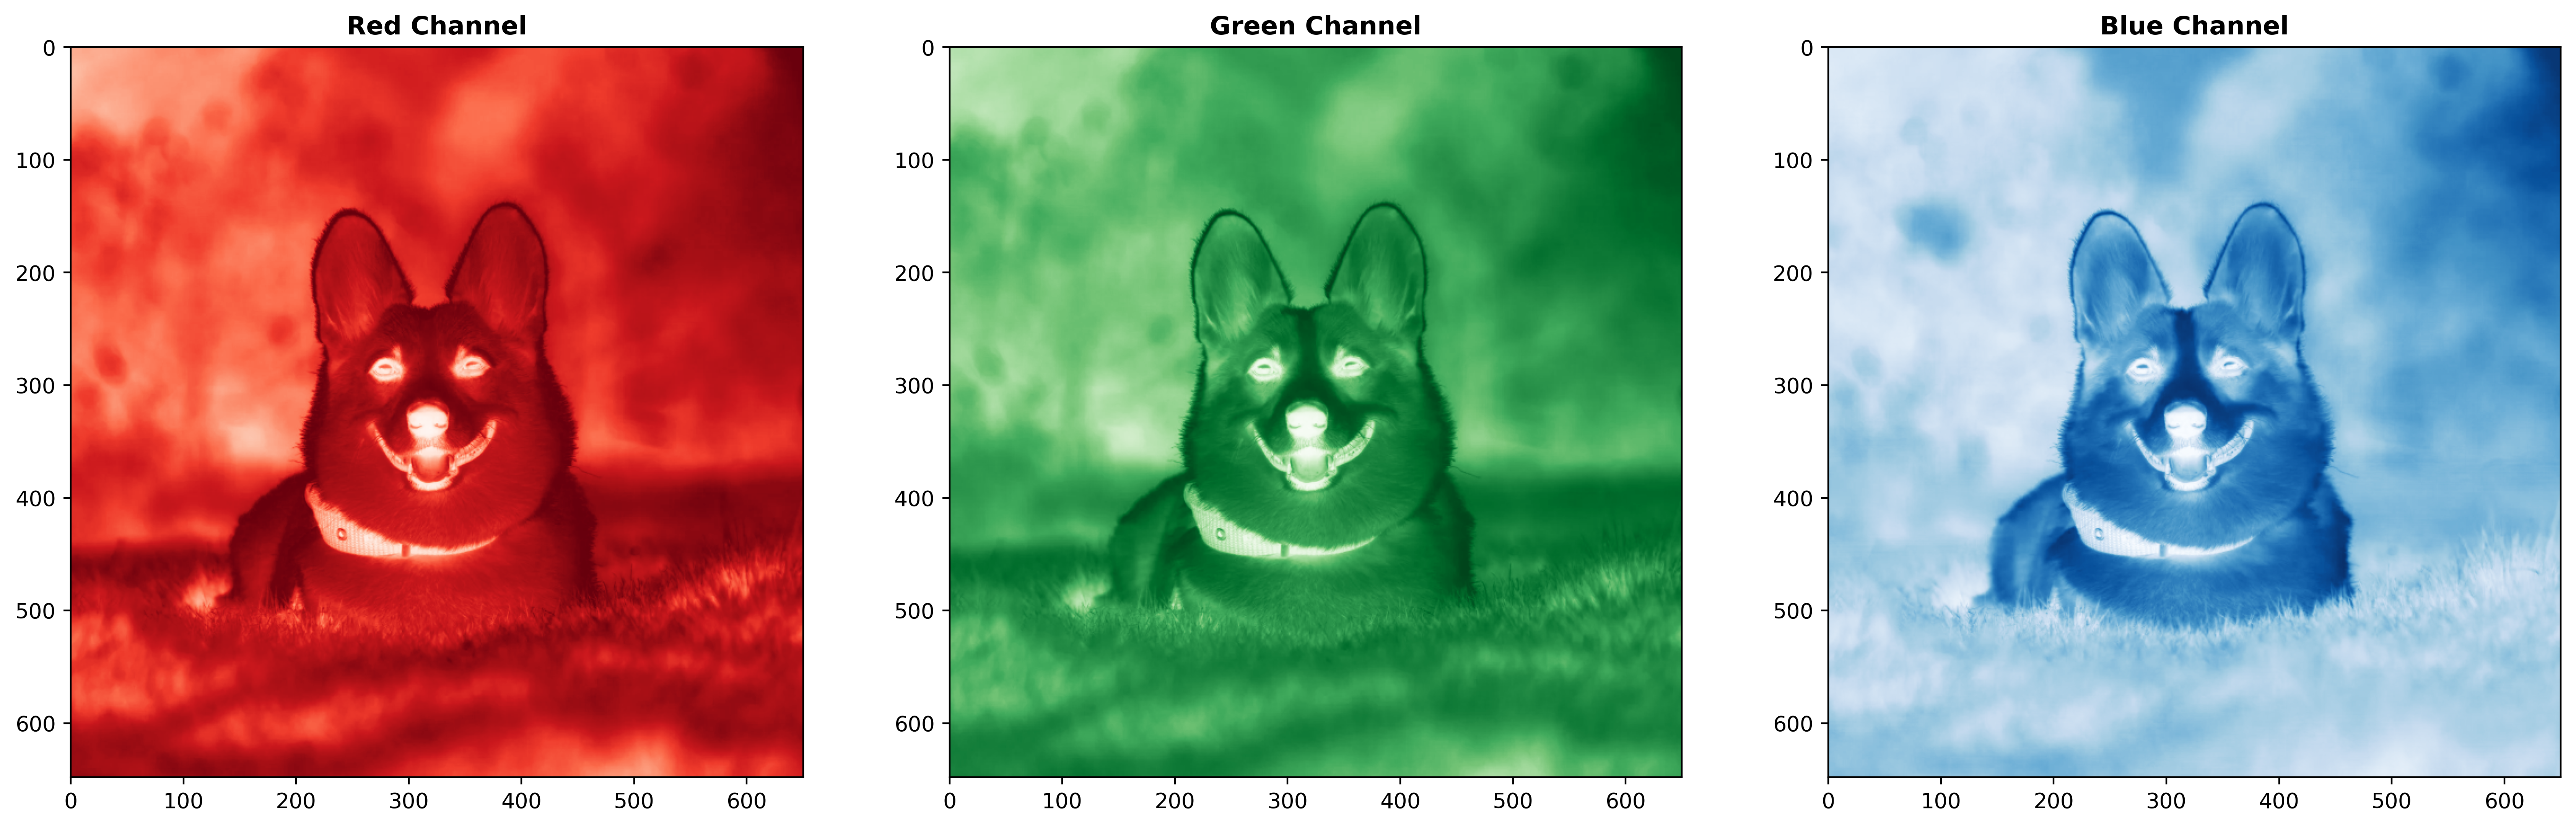

In [13]:
import rasterio
from rasterio.plot import show
from PIL import ImageFont, ImageDraw
from matplotlib import pyplot
from matplotlib import rcParams
src = rasterio.open('img/dog.png')
image = src.read()
# 400 dpi
rcParams['figure.dpi'] = 400

# transparent background
rcParams['figure.facecolor'] = 'none'

# no axes
rcParams['axes.facecolor'] = 'none'

# font = ImageFont.truetype('fonts/Karla-Regular.ttf', 20)
fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
show((src, 1), ax=axr, cmap='Reds', title='Red Channel')
show((src, 2), ax=axg, cmap='Greens', title='Green Channel')
show((src, 3), ax=axb, cmap='Blues', title='Blue Channel')

pyplot.savefig('img/dog_channels.png', transparent=True, bbox_inches='tight', pad_inches=0)

Predicted: -69512.277


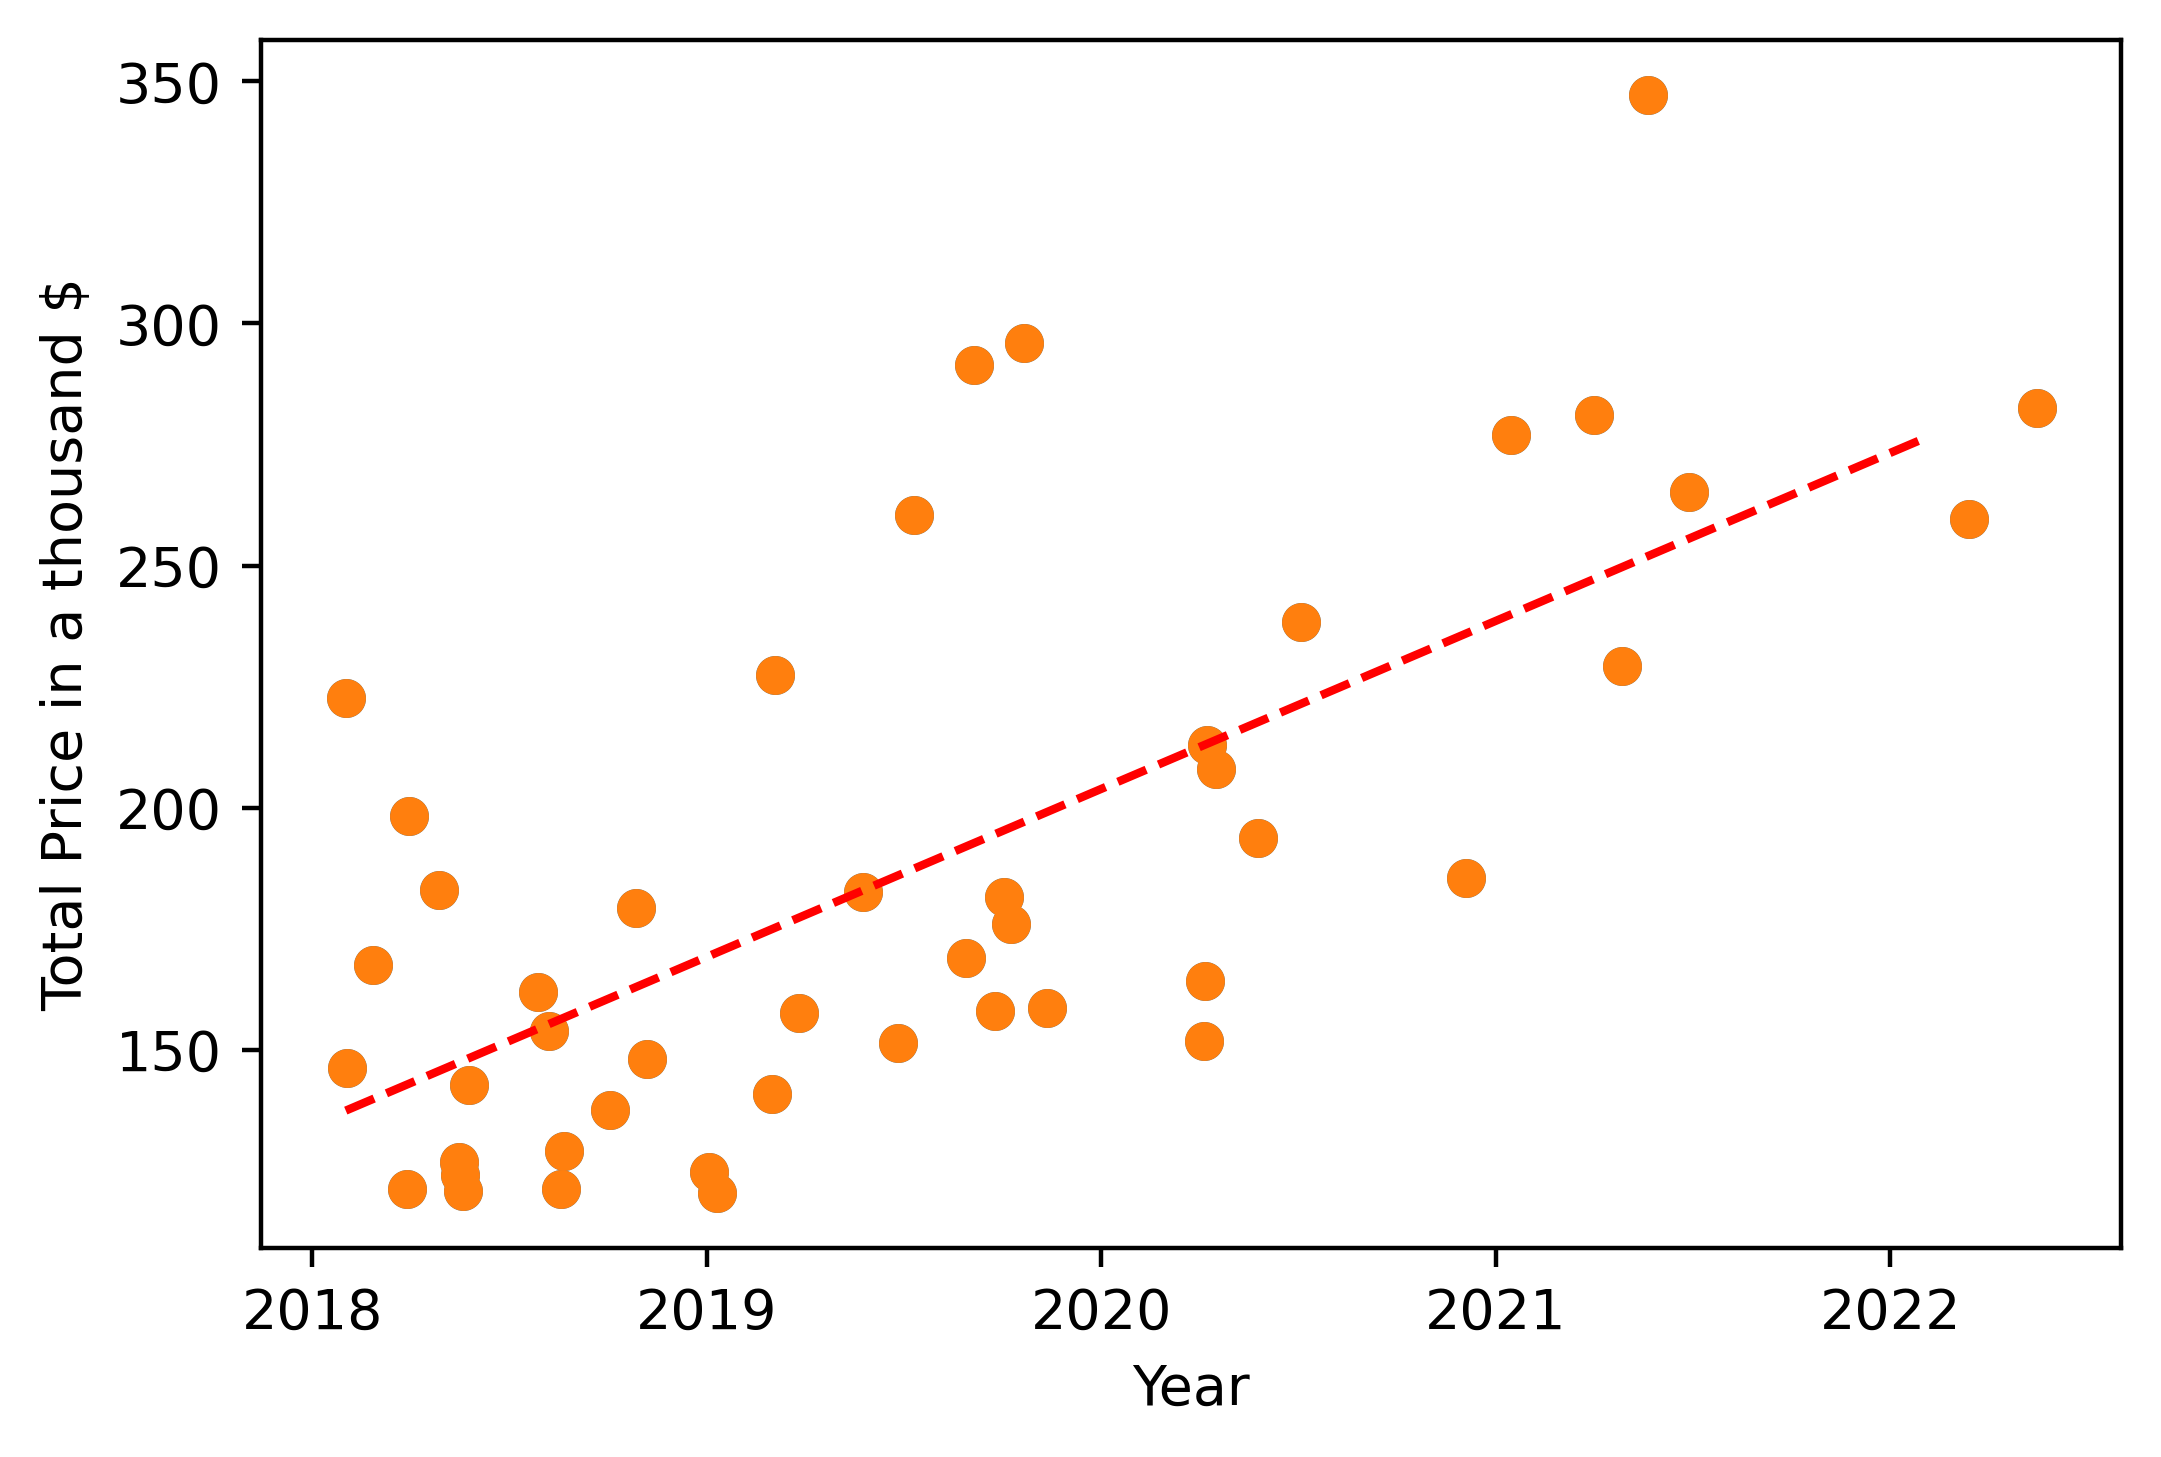

In [49]:
# predict the housing price in a given neighborhood

# generate a random dataset
from tkinter.tix import X_REGION
from sklearn.datasets import make_regression
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np
# generate regression dataset 
X, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=1)
# select x,y that are both greater than 0
index= np.where((X>0) & (y>0))
# intersect the two array
index = np.intersect1d(index[0], index[1])
X=X[index]
y=y[index]
X=X*2+2018
y=y+100
# scatter plot
pyplot.scatter(X, y)
# label the axes
pyplot.xlabel('Year')
pyplot.ylabel('Total Price in a thousand $')
# save figure
pyplot.savefig('img/price.png', transparent=True, bbox_inches='tight', pad_inches=0)
# fit a linear regression model
from sklearn.linear_model import LinearRegression
# define model
model = LinearRegression()
# fit model
model.fit(X, y)
# make a prediction for a new input value
x_input = 10
yhat = model.predict([[x_input]])
print('Predicted: %.3f' % yhat[0])

# plot the dataset and the model
from matplotlib import pyplot
from pandas import DataFrame
# scatter plot
pyplot.scatter(X, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(X), max(X), 1).reshape(-1, 1)
# calculate the output for the range
y_line = model.predict(x_line)
# create a line plot for the mapping function
pyplot.xlabel('Year')
pyplot.ylabel('Total Price in a thousand $')
pyplot.plot(x_line, y_line, '--', color='red')
# save figure
pyplot.savefig('img/price_model.png', transparent=True, bbox_inches='tight', pad_inches=0)



In [3]:
# record a wav file
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 2
WAVE_OUTPUT_FILENAME = "voice.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

                


* recording
* done recording


<ipython-input-21-dd55ff42e6b7>:16: FutureWarning: Pass y=[ 0.00039447 -0.00057192  0.00580321 ...  0.03327171  0.0173527
  0.01791707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


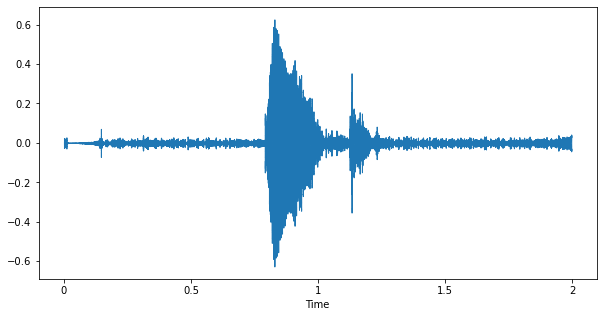

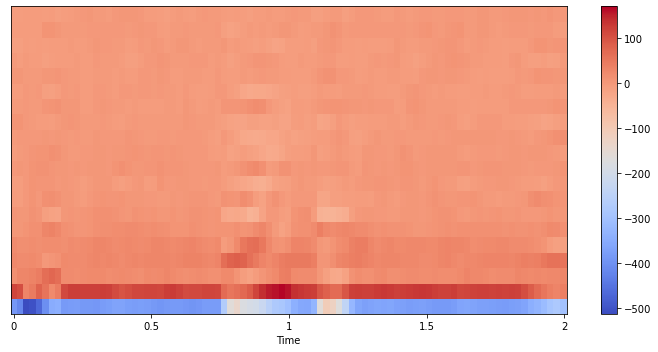

In [21]:
# record an audio file
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
# load audio file with Librosa
audio_path = 'voice.wav'
x , sr = librosa.load(audio_path)
# plot the signal:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(x, sr=sr)
plt.savefig('img/voice.png', transparent=True, bbox_inches='tight', pad_inches=0)

# extract mfcc features
mfccs = librosa.feature.mfcc(x, sr=sr)
# display the MFCCs:
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
# plt.title('MFCC Features')
plt.tight_layout()
plt.savefig('img/mfcc.png', transparent=True, bbox_inches='tight', pad_inches=0)

In [16]:
# visualize the spam detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# load the dataset
df = pd.read_csv('data/spam.csv', encoding='latin-1')
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
# rename columns to something better
df.columns = ['labels', 'data']
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].values
# split up the data
df_train = df[:4400]
df_test = df[4400:]
# count spam and ham
df_train.groupby('labels').describe()
# count the number of words in spam and ham
df_train['data'].str.len().plot.hist()
# count the number of words in spam and ham


array([[-388.32202   , -417.69342   , -513.25665   , ..., -290.39252   ,
        -279.40027   , -297.4361    ],
       [ 118.490364  ,  107.241455  ,   33.981483  , ...,   41.98085   ,
          32.01658   ,   41.01461   ],
       [  17.746998  ,   29.710716  ,   29.733864  , ...,   27.909698  ,
          26.974197  ,   29.638725  ],
       ...,
       [  -9.035651  ,  -10.786119  ,   -3.325371  , ...,    4.764704  ,
           5.3961453 ,    6.3096304 ],
       [  -5.136993  ,   -3.2825425 ,   -3.5765655 , ...,    0.51515406,
          -3.5889173 ,   -5.686934  ],
       [  -7.4891024 ,   -5.9777613 ,   -2.9617448 , ...,    5.7238946 ,
           1.5147567 ,    0.70239997]], dtype=float32)